In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
dataset = pd.read_csv('/content/wine.csv')
dataset.head()



,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
#split into dependant and independent variable
y=dataset[['Wine']]
x=dataset.drop('Wine', axis=1)


In [21]:
x.head(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
y.head(5)

,Wine
0,1
1,1
2,1
3,1
4,1


In [23]:
correlation_matrix = x.corr() #Transposing Features and passing it into numpy Covarience matrix
print(correlation_matrix)

                       Alcohol  Malic.acid  ...        OD   Proline
Alcohol               1.000000    0.094397  ...  0.072343  0.643720
Malic.acid            0.094397    1.000000  ... -0.368710 -0.192011
Ash                   0.211545    0.164045  ...  0.003911  0.223626
Acl                  -0.310235    0.288500  ... -0.276769 -0.440597
Mg                    0.270798   -0.054575  ...  0.066004  0.393351
Phenols               0.289101   -0.335167  ...  0.699949  0.498115
Flavanoids            0.236815   -0.411007  ...  0.787194  0.494193
Nonflavanoid.phenols -0.155929    0.292977  ... -0.503270 -0.311385
Proanth               0.136698   -0.220746  ...  0.519067  0.330417
Color.int             0.546364    0.248985  ... -0.428815  0.316100
Hue                  -0.071747   -0.561296  ...  0.565468  0.236183
OD                    0.072343   -0.368710  ...  1.000000  0.312761
Proline               0.643720   -0.192011  ...  0.312761  1.000000

[13 rows x 13 columns]


In [24]:
eig_values, eig_vectors = np.linalg.eig(correlation_matrix)

In [25]:
print('Eigenvectors \n%s' %eig_vectors)

Eigenvectors 
[[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865
  -0.05639636  0.01496997 -0.39613926  0.26628645  0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385
   0.42052391  0.02596375 -0.06582674 -0.12169604 -0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466
  -0.14917061 -0.14121803  0.17026002  0.04962237 -0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451
  -0.28696914  0.09168285 -0.42797018  0.05574287  0.20044931  0.47931378
   0.05279942]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394
   0.3228833   0.05677422  0.15636143 -0.06222011  0.27140257  0.07128891
   0.06787022]
 [-0.39466085 -0.06503951 -0.14617896  0.19806835  0.14931841  0.0841223
  -0.02792498 -0.46390791  0.40593409  0.30388245  0.28603452  0.30434119
  -0.32013135]
 [-0.4229

In [26]:
eig_values

array([4.70585025, 2.49697373, 1.44607197, 0.91897392, 0.85322818,
       0.64165703, 0.55102831, 0.10337794, 0.34849736, 0.16877023,
       0.28887994, 0.22578864, 0.25090248])

In [27]:
eig_values=np.sort(eig_values)

In [28]:
print('\n  Eigen Values \n %s' %np.sort(eig_values))


  Eigen Values 
 [0.10337794 0.16877023 0.22578864 0.25090248 0.28887994 0.34849736
 0.55102831 0.64165703 0.85322818 0.91897392 1.44607197 2.49697373
 4.70585025]


In [29]:
# I reduce dimension to 2 dimension, since 2 eigenvector has 67.85% variances
(100*((eig_values[3]+eig_values[2] )/ sum(eig_values)))


3.6668547839339913

In [30]:
eig_vectors.T[0]

array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])

In [31]:
eig_vectors.T[2]

array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
       -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
       -0.08522192, -0.16600459,  0.12674592])

In [33]:
PC1 = x.dot(eig_vectors.T[0])

In [34]:
PC2 = x.dot(eig_vectors.T[2])

In [35]:
PC1

0     -325.637020
1     -317.812078
2     -355.267740
3     -442.477439
4     -227.486905
          ...    
173   -222.628343
174   -226.502009
175   -253.624048
176   -255.586884
177   -170.731645
Length: 178, dtype: float64

In [36]:
result = pd.DataFrame({'PC1':PC1,'PC2':PC2})
result['Wine'] = y

In [37]:
result.head(20)

,PC1,PC2,Wine
0,-325.637020,108.881634,1
1,-317.812078,113.299757,1
2,-355.267740,125.247133,1
3,-442.477439,162.736042,1
4,-227.486905,64.458236,1
5,-433.694797,160.110158,1
6,-385.428472,142.244167,1
7,-389.410504,137.642593,1
8,-315.643798,111.712713,1
9,-315.424680,110.266374,1


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


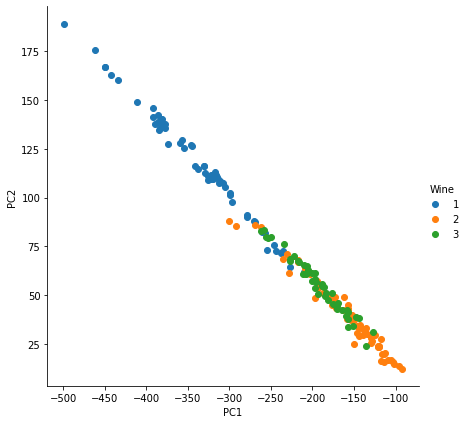

In [43]:
import seaborn as sn
sn.FacetGrid(result,hue="Wine",size=6).map(plt.scatter,"PC1","PC2").add_legend()

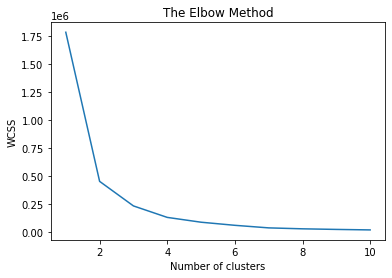

In [44]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=result.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

In [49]:
x = result.iloc[:,0:2] 
x

,PC1,PC2
0,-325.637020,108.881634
1,-317.812078,113.299757
2,-355.267740,125.247133
3,-442.477439,162.736042
4,-227.486905,64.458236
...,...,...
173,-222.628343,69.757825
174,-226.502009,68.545825
175,-253.624048,79.335987
176,-255.586884,79.855396


In [51]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

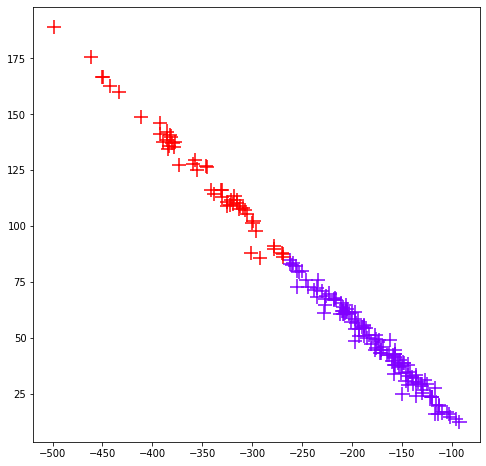

In [54]:
data_with_clusters = result.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['PC1'],data_with_clusters['PC2'],c=data_with_clusters['Clusters'],s=200,marker='+',cmap='rainbow')

In [55]:
x=result.iloc[:,:2]
y=result.iloc[:,2]

In [56]:
x

,PC1,PC2
0,-325.637020,108.881634
1,-317.812078,113.299757
2,-355.267740,125.247133
3,-442.477439,162.736042
4,-227.486905,64.458236
...,...,...
173,-222.628343,69.757825
174,-226.502009,68.545825
175,-253.624048,79.335987
176,-255.586884,79.855396


In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred=regressor.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

In [62]:
score

0.45697562126922187

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model= LogisticRegression()

In [65]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
model.predict(X_test)

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 3, 3, 2, 1, 1, 2, 1, 3, 1,
       2, 3, 3, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [67]:
model.score(X_test,Y_test)

0.7777777777777778